EXERCISE 1: HARRIS CORNER DETECTION

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('meow4x.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

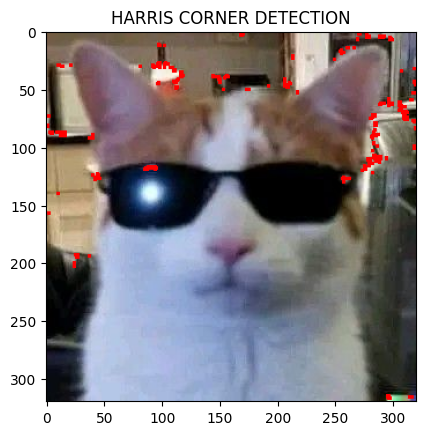

In [3]:
gray = np.float32(gray)
harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)

harris_corners = cv2.dilate(harris_corners, None)
image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('HARRIS CORNER DETECTION')
plt.show()

EXERCISE 2: HOG - HISTOGRAM OF ORIENTED GRADIENTS (FEATURE EXTRACTION)

In [4]:
from skimage.feature import hog
from skimage import data, exposure

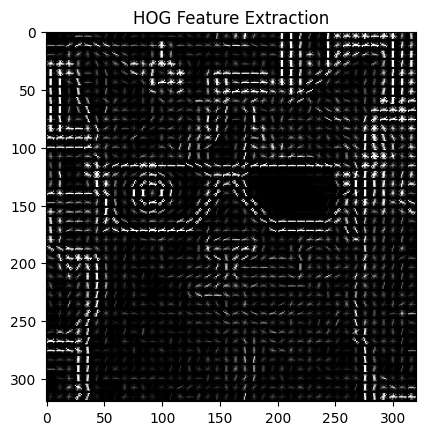

In [6]:
hog_features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG FEATURE EXTRACTION')
plt.show()


EXERXISE 3: FAST KEYPOINT DETECTION

In [9]:
image = cv2.imread('meow4x.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

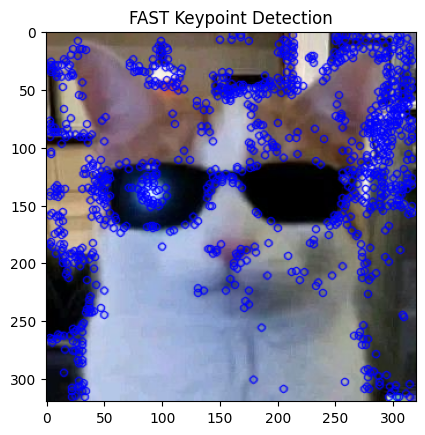

In [10]:
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray, None)

output_image = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('FAST KEYPOINT DETECTION')
plt.show()

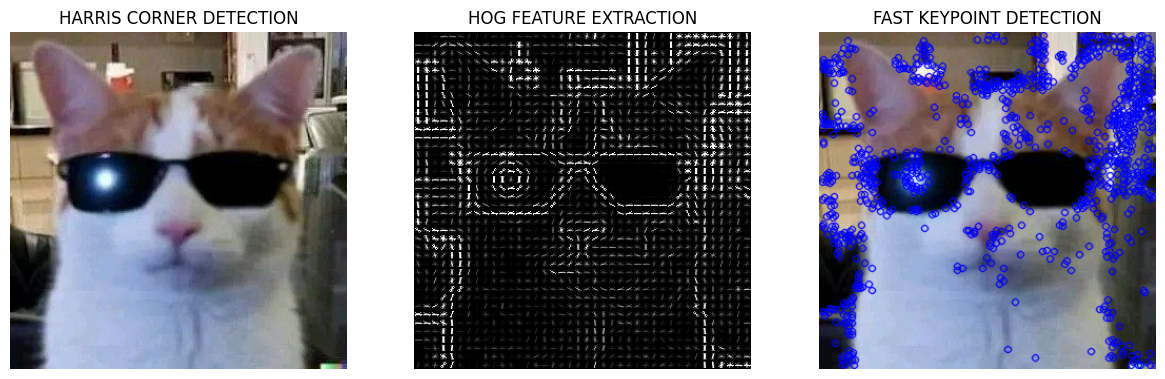

In [11]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('HARRIS CORNER DETECTION')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG FEATURE EXTRACTION')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('FAST KEYPOINT DETECTION')
plt.axis('off')


plt.show()

EXERCISE 4: FEATURE MATCHING USING ORB AND FLANN

In [12]:
img1 = cv2.imread('meow4x.jpg', 0)
img2 = cv2.imread('meow5x.jpg', 0)

In [13]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [14]:
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

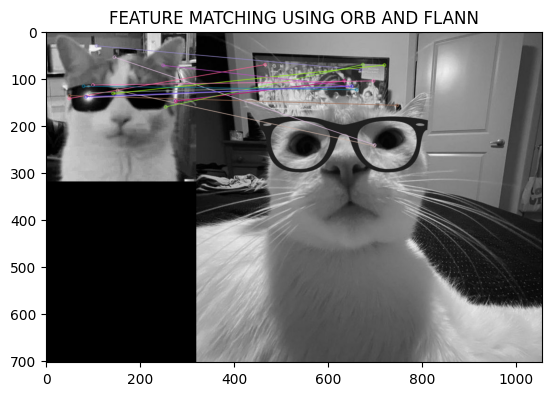

In [16]:
matches = flann.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

plt.imshow(result)
plt.title('FEATURE MATCHING USING ORB AND FLANN')
plt.show()

EXERCISE 5: IMAGE SEGMENTATION USING WATERSHED ALGO

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
image = cv2.imread('meow5x.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [21]:
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [22]:
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [23]:
_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 0] = 0

markers = cv2.watershed(image, markers)

image[markers == -1] = [255, 0, 0]

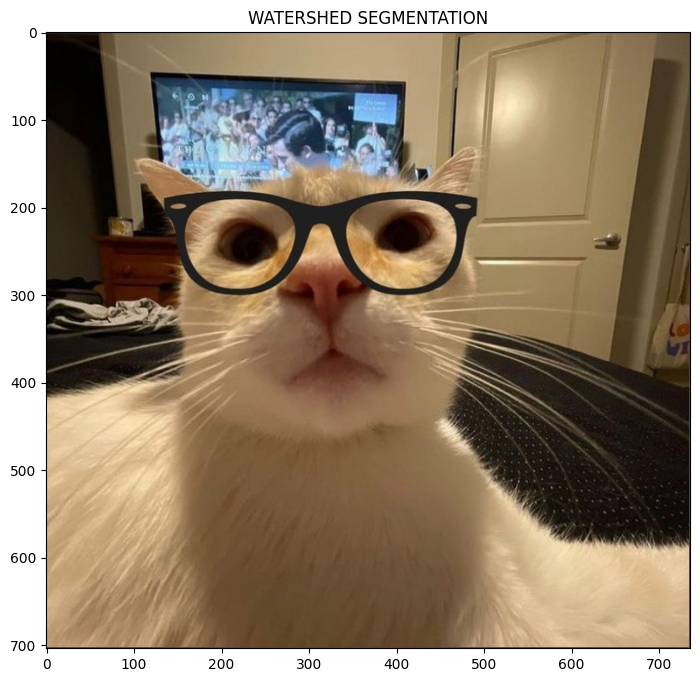

In [25]:
boundary_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boundary_img[markers == -1] = [255, 0, 0]

plt.figure(figsize=(10, 8))
plt.imshow(boundary_img)
plt.title('WATERSHED SEGMENTATION')
plt.show()

(-0.5, 735.5, 703.5, -0.5)

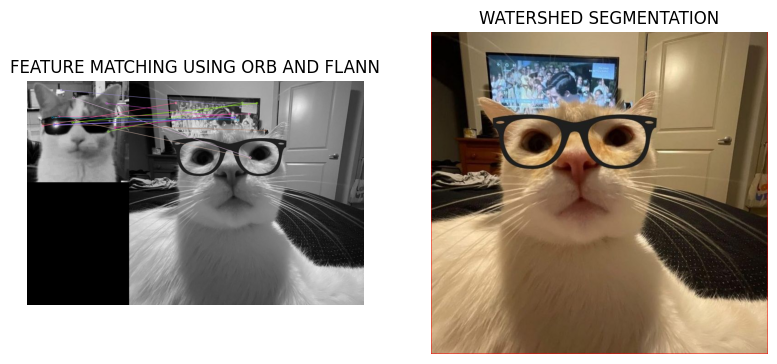

In [26]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
plt.imshow(result)
plt.title('FEATURE MATCHING USING ORB AND FLANN')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(boundary_img)
plt.title('WATERSHED SEGMENTATION')
plt.axis('off')